In [37]:
# Libraries used for analysis 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium import IFrame
import matplotlib.pyplot as plt
import numpy as np




In [3]:
# Files upload 

rest = pd.read_csv("FOOD_CATEGORY_restaurants_output.csv")
menus = pd.read_csv("FOOD_CATEGORY_restaurant_menus_output.csv")

In [4]:
# Preview the restaurants data

print(rest.head())

   Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0  rm_restaurant_id  \
0            21            21          21                28   
1            28            28          28                43   
2            46            46          46                68   
3            80            80          80               106   
4            81            81          81               108   

                        r_onlyname      r_city r_state  r_score  r_ratings  \
0  Sunny  Fines Breakfast Burritos  birmingham      al      NaN        NaN   
1                        Taco Bell  birmingham      al      4.1       91.0   
2     Los Arcos Mexican Restaurant  birmingham      al      4.3      100.0   
3            Taqueria La Herradura  birmingham      al      NaN        NaN   
4               Cabo Coastal Grill  birmingham      al      NaN        NaN   

                                r_category r_price_range      r_lat  \
0  mexican, breakfast and brunch, burritos             $  33.509800   
1         

In [5]:
# Preview the menus data

print(menus.head())

   Unnamed: 0  restaurant_id            category                    name  \
0        1319             28      Picked for you              Home Fries   
1        1320             28      Picked for you             Hash Browns   
2        1321             28      Picked for you            Orange Juice   
3        1322             28      Picked for you              Tater Tots   
4        1323             28  Breakfast Burritos  Build Your Own Burrito   

                                         description      price  
0                                                NaN   4.78 USD  
1                                                NaN   4.78 USD  
2                                                NaN   4.32 USD  
3                                                NaN   4.78 USD  
4  Two scrambled eggs with your choice of meat an...  11.98 USD  


In [6]:
# Mapping the price range to numeric values
price_mapping = {'$': 1, '$$': 2, '$$$': 3, '$$$$': 4}
rest['price_numeric'] = rest['r_price_range'].map(price_mapping)

In [13]:
# Count the number of restaurants in each price range
restaurant_counts = rest.groupby('price_numeric').agg({'rm_restaurant_id': 'count'})

# Results and comments
print(restaurant_counts)
print("\nThere is no category $$$$ = Very Expensive for mexican restaurants")

               rm_restaurant_id
price_numeric                  
1                           387
2                           150
3                            13

There is no category $$$$ = Very Expensive for mexican restaurants


In [17]:
# Count the number of restaurants for each location
restaurant_counts_city = rest.groupby('r_city').agg({'rm_restaurant_id': 'count'})

# total number of all restaurants in selected sample
total = restaurant_counts_city["rm_restaurant_id"].sum()

# Results and comments
print(restaurant_counts_city)
print("\nTotal number of restaurants: ", total)


                rm_restaurant_id
r_city                          
arlington                     33
austin                        79
birmingham                    15
milwaukee                     82
portland                     117
salt lake city                75
spokane                       36
washington dc                113

Total number of restaurants:  550


Correlation between price range and review ratings: 0.009624519839513703


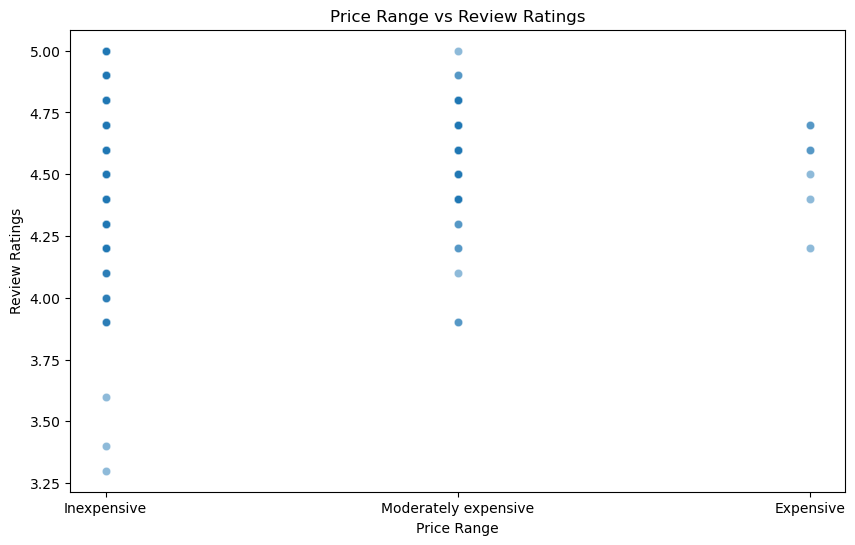

The results indicate that there is a very weak positive correlation between the two variables.


In [11]:
# Correlation between price range and review ratings

# Analyze if there is a correlation between the price range of a restaurant 
# and its review ratings. This will help an investor to understand if customers 
# generally prefer more expensive or more affordable restaurants and if price 
# impacts customer satisfaction.

# Calculate the correlation between price range and review ratings
price_review_correlation = rest['price_numeric'].corr(rest['r_score'])
print(f"Correlation between price range and review ratings: {price_review_correlation}")

# Visualize the relationship between price range and review ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rest, x='price_numeric', y='r_score', alpha=0.5)
plt.xlabel('Price Range')
plt.xticks([1, 2, 3], ['Inexpensive', 'Moderately expensive', 'Expensive'])
plt.ylabel('Review Ratings')
plt.title('Price Range vs Review Ratings')
plt.show()

# Results and comments
print(f"The results indicate that there is a very weak positive correlation between the two variables.")


In [26]:
# Group the data by city and calculate the average, min and max prices, and count of restaurants
city_data = rest.groupby('r_city').agg(
    {'r_lng': 'first',
     'r_lat': 'first',
     'min': 'mean',
     'max': 'mean',
     'mean': 'mean',
     'rm_restaurant_id': 'count'}).reset_index()

city_data.rename(columns={'rm_restaurant_id': 'restaurant_count'}, inplace=True)

print(city_data)

           r_city       r_lng      r_lat       min        max       mean  \
0       arlington  -77.084398  38.891801  3.269697  44.143030  11.436897   
1          austin  -97.671041  30.421561  3.458481  20.880886   9.409318   
2      birmingham  -86.854640  33.509800  3.398000  27.756667  10.679265   
3       milwaukee  -88.028043  42.986556  3.481098  26.906341  10.011146   
4        portland -122.558350  45.573150  3.565983  21.466923   9.500023   
5  salt lake city -111.891910  40.746870  3.746000  20.309867   9.415794   
6         spokane -117.410200  47.750630  3.527500  23.167500   9.557789   
7   washington dc  -77.028640  38.916800  3.985487  30.927965  11.456066   

   restaurant_count  
0                33  
1                79  
2                15  
3                82  
4               117  
5                75  
6                36  
7               113  


In [40]:
# Create a base map centered on the average latitude and longitude of the cities
map_center_lat = city_data['r_lat'].mean()
map_center_lng = city_data['r_lng'].mean()
map = folium.Map(location=[map_center_lat, map_center_lng], zoom_start=5)

# Add markers for each city with the desired information and customized popup windows
for index, row in city_data.iterrows():
    # Create the HTML content for the popup window
    html = f"""
    <div style="font-family: Arial, sans-serif; font-size: 14px;">
        <h3>City: {row['r_city']}</h3>
        <p>Restaurants: {row['restaurant_count']}</p>
        <p>Menu Average Price: {row['mean']:.2f}</p>
        <p>Menu Min Price: {row['min']:.2f}</p>
        <p>Menu Max Price: {row['max']:.2f}</p>
    </div>
    """

    # Create an IFrame with the HTML content and desired width and height
    iframe = IFrame(html, width=300, height=150)

    # Create a Popup with the IFrame
    popup = folium.Popup(iframe)

    # Add a marker with the popup to the map
    folium.Marker(
        location=[row['r_lat'], row['r_lng']],
        popup=popup,
        tooltip=row['r_city']
    ).add_to(map)


# Same map as HTML file
map.save('map.html')

# Display the map
map

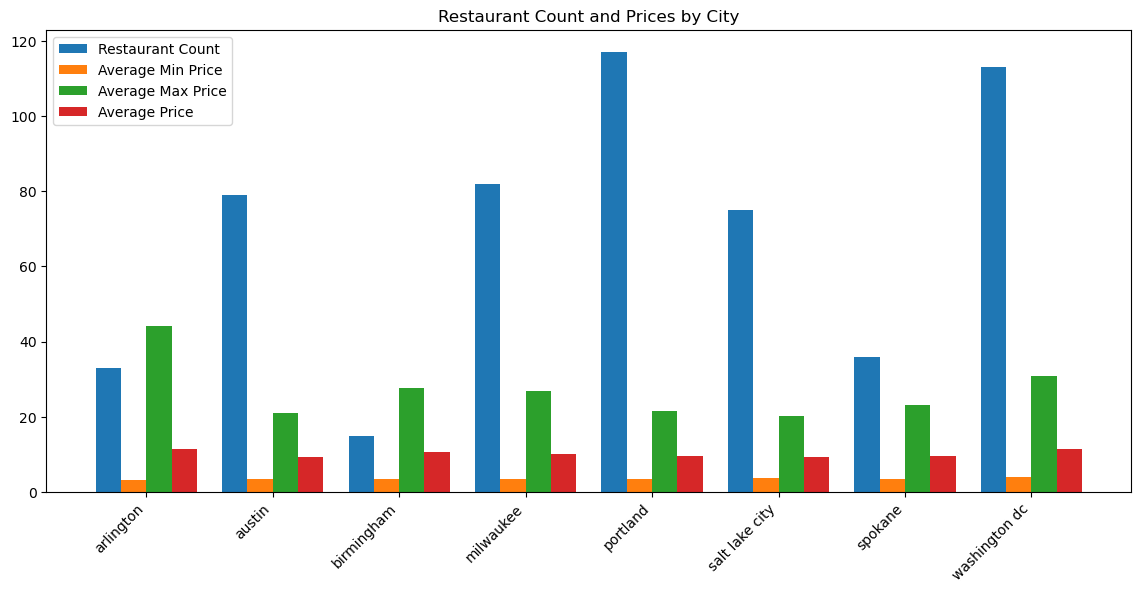

In [29]:

# Set up the figure and axis for the bar chart
fig, ax = plt.subplots(figsize=(14, 6))

# Set up the x-axis labels and positions
cities = city_data['r_city']
x = np.arange(len(cities))
width = 0.2

# Create bars for each data category
restaurant_count_bars = ax.bar(x - (width * 1.5), city_data['restaurant_count'], width, label='Restaurant Count')
min_price_bars = ax.bar(x - width / 2, city_data['min'], width, label='Average Min Price')
max_price_bars = ax.bar(x + width / 2, city_data['max'], width, label='Average Max Price')
mean_price_bars = ax.bar(x + (width * 1.5), city_data['mean'], width, label='Average Price')

# Configure the x-axis labels and title
ax.set_xticks(x)
ax.set_xticklabels(cities, rotation=45, ha='right')
ax.set_title('Restaurant Count and Prices by City')

# Add a legend
ax.legend()

# Show the plot
plt.show()

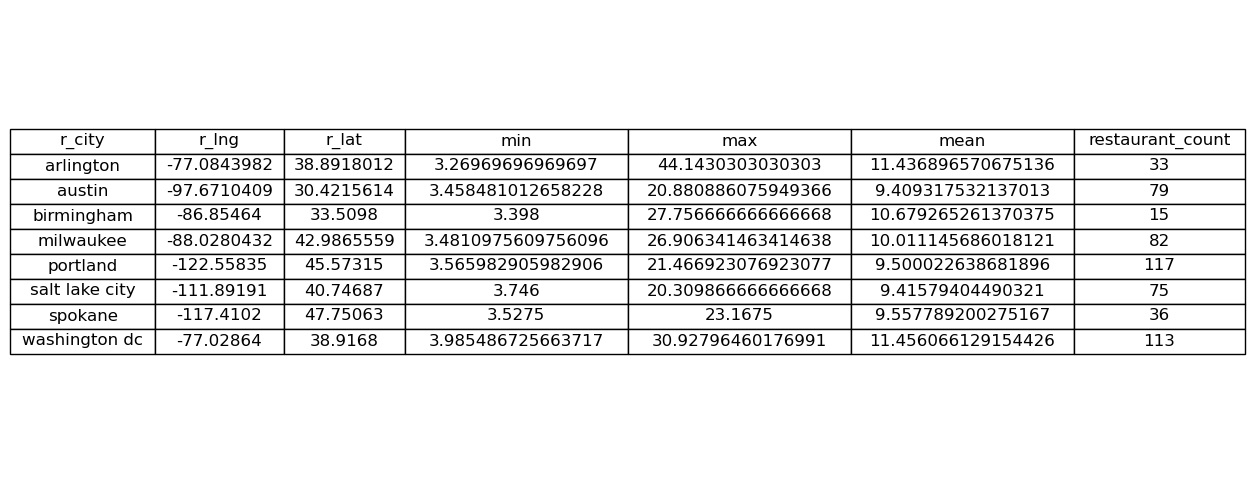

In [30]:
fig, ax = plt.subplots(figsize=(10, 6))

# Remove the default axis
ax.axis('off')

# Create a table with the city_data
table = ax.table(cellText=city_data.values, colLabels=city_data.columns, cellLoc='center', loc='center')

# Format the table
table.auto_set_font_size(False)
table.set_fontsize(12)
table.auto_set_column_width(col=list(range(len(city_data.columns))))
table.scale(1.5, 1.5)

# Show the table
plt.show()

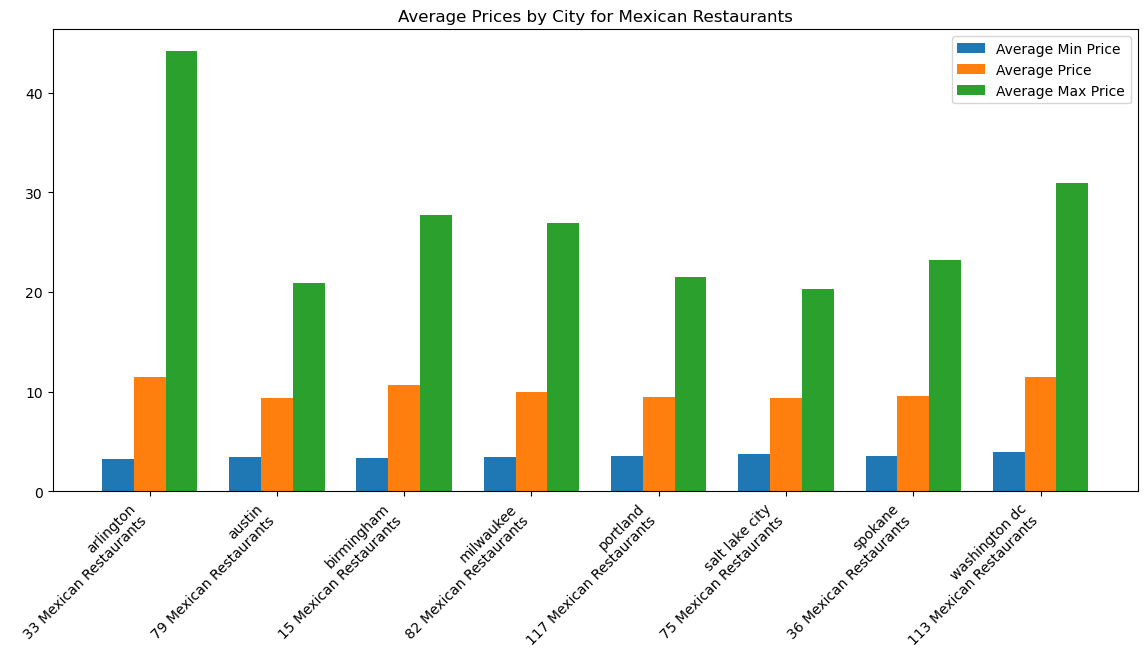

In [31]:
# Set up the figure and axis for the bar chart
fig, ax = plt.subplots(figsize=(14, 6))

# Set up the x-axis labels and positions
cities = city_data['r_city']
x = np.arange(len(cities))
width = 0.25

# Create bars for min, mean, and max prices
min_price_bars = ax.bar(x - width, city_data['min'], width, label='Average Min Price')
mean_price_bars = ax.bar(x, city_data['mean'], width, label='Average Price')
max_price_bars = ax.bar(x + width, city_data['max'], width, label='Average Max Price')

# Configure the x-axis labels and title
ax.set_xticks(x)
city_labels = [f"{city}\n{count} Mexican Restaurants" for city, count in zip(cities, city_data['restaurant_count'])]
ax.set_xticklabels(city_labels, rotation=45, ha='right', fontsize=10)
ax.set_title('Average Prices by City for Mexican Restaurants')

# Add a legend
ax.legend()

# Show the plot
plt.show()

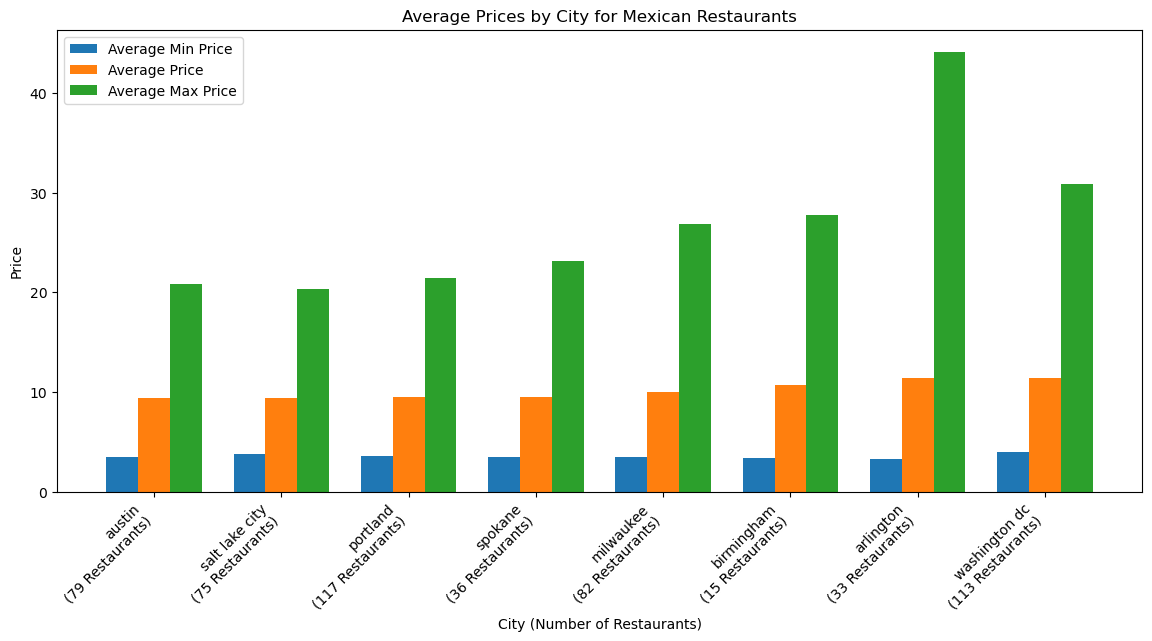

In [32]:
city_data_sorted = city_data.sort_values(by='mean').reset_index(drop=True)

import matplotlib.pyplot as plt
import numpy as np

# Set up the figure and axis for the bar chart
fig, ax = plt.subplots(figsize=(14, 6))

# Set up the x-axis labels and positions
cities = city_data_sorted['r_city']
x = np.arange(len(cities))
width = 0.25

# Create bars for min, mean, and max prices
min_price_bars = ax.bar(x - width, city_data_sorted['min'], width, label='Average Min Price')
mean_price_bars = ax.bar(x, city_data_sorted['mean'], width, label='Average Price')
max_price_bars = ax.bar(x + width, city_data_sorted['max'], width, label='Average Max Price')

# Configure the x-axis labels and title
ax.set_xticks(x)
city_labels = [f"{city}\n({count} Restaurants)" for city, count in zip(cities, city_data_sorted['restaurant_count'])]
ax.set_xticklabels(city_labels, rotation=45, ha='right', fontsize=10)
ax.set_title('Average Prices by City for Mexican Restaurants')

# Add labels to the axes
ax.set_xlabel('City (Number of Restaurants)')
ax.set_ylabel('Price')

# Add a legend
ax.legend()

# Show the plot
plt.show()